In [ ]:
!pip install ucimlrepo

In [65]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler

heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

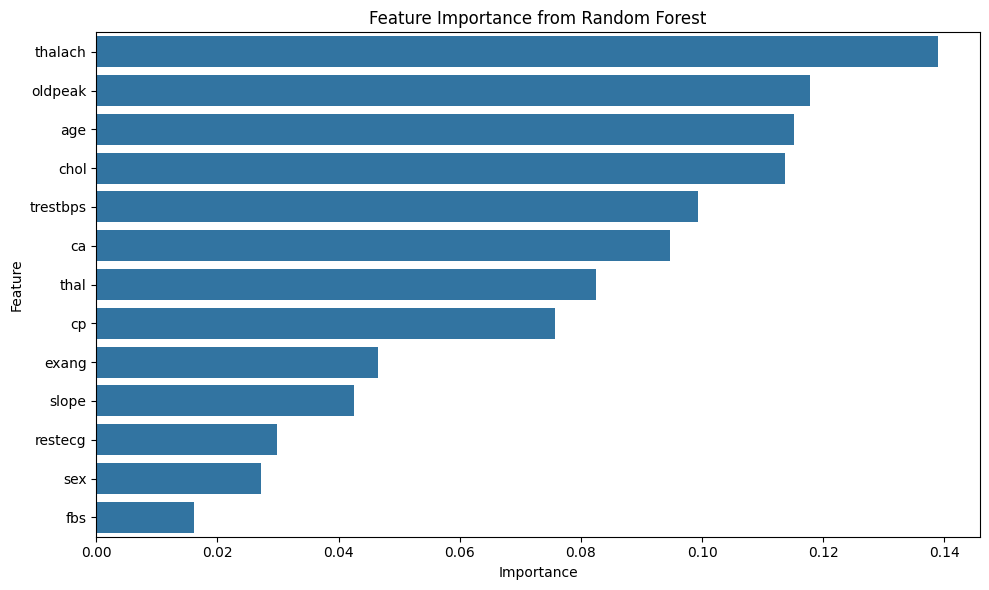

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_cleaned, y_cleaned.values.ravel())

importances = rf.feature_importances_
feature_names = X_cleaned.columns

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()

In [68]:
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=8)
rfe.fit(X_encoded, y_cleaned.values.ravel())

rfe_features = X_encoded.columns[rfe.support_]
print("Selected Features by RFE:",list(rfe_features))

Selected Features by RFE: ['fbs', 'cp_4', 'slope_2', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_6.0', 'thal_7.0']


In [69]:
from sklearn.feature_selection import SelectKBest, chi2

chi_selector = SelectKBest(score_func=chi2, k=8)
X_chi = chi_selector.fit_transform(X_encoded, y_cleaned.values.ravel())

selected_chi = X_encoded.columns[chi_selector.get_support()]
print("Selected Features by Chi-Square Test:", selected_chi.tolist())

Selected Features by Chi-Square Test: ['chol', 'thalach', 'exang', 'oldpeak', 'cp_4', 'ca_2.0', 'ca_3.0', 'thal_7.0']


In [70]:
final_features = list(set(rfe_features).union(set(selected_chi)))
print("Final Selected Features:", final_features)

X_selected = X_encoded[final_features]

Final Selected Features: ['exang', 'thalach', 'slope_2', 'fbs', 'oldpeak', 'thal_6.0', 'ca_3.0', 'ca_1.0', 'chol', 'cp_4', 'thal_7.0', 'ca_2.0']
